# Importation

In [1]:
import random as rd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import permutations

In [2]:
chemin = r"Pb3.txt"
nom = chemin[:3]

In [3]:
f = open(chemin,'r')
l = f.readlines()
l = [li.strip().split(' ') for li in l[1:]]
l = [[int(li[0]),int(li[1])] for li in l]
f.close()

In [4]:
len(l)

400

# Results DataFrame 

In [5]:
"""nb_meth = 3
methods = ["greedy","swap","genetic"]
noms_fichiers = ["Pb1","Pb2","Pb3","Pb4","Pb5"]
d = {f : [-1]*nb_meth for f in noms_fichiers}
df = pd.DataFrame(d,columns=methods,index=noms_fichiers)"""

'nb_meth = 3\nmethods = ["greedy","swap","genetic"]\nnoms_fichiers = ["Pb1","Pb2","Pb3","Pb4","Pb5"]\nd = {f : [-1]*nb_meth for f in noms_fichiers}\ndf = pd.DataFrame(d,columns=methods,index=noms_fichiers)'

In [6]:
df = pd.read_csv("results.csv")
df.index=["Pb1","Pb2","Pb3","Pb4","Pb5"]

# Basic Functions

In [7]:
def distance(p1,p2):
    x1,y1=p1
    x2,y2=p2
    d=((x1-x2)**2+(y1-y2)**2)**0.5
    return d

In [8]:
distance([1,2],[2,3])

1.4142135623730951

In [9]:
def plus_proche(p,l_ini):
    l=l_ini.copy()
    if p in l:
        l.remove(p)
    pp=l[0]
    d=distance(p,pp)
    for pi in l:
        di=distance(p,pi)
        if di<d:
            d=di
            pp=pi
                
    return pp,d

In [10]:
a=[[10,2],[2,3],[3,4]]
p=[2,3]
plus_proche(p,a)

([3, 4], 1.4142135623730951)

In [11]:
def parcours(l):
    d=0
    p0=l[0]
    for pi in l[1:]:
        di=distance(p0,pi)
        d+=di
        p0=pi
    d+=distance(p0,l[0])
    return d

In [12]:
def exhaustif(l):
    permutations_list = list(permutations(l))
    d = parcours(permutations_list[0])
    chemin = permutations_list[0]
    for perm in permutations_list:
        di = parcours(perm)
        if di<d:
            d=di
            chemin=perm
    return chemin

In [13]:
def afficher(chemin):
    x = [p[0] for p in chemin]
    y = [p[1] for p in chemin]
    plt.plot(x,y,'-')
    plt.scatter(x,y,s=10,color='green')

In [14]:
def check_duplicates(list_of_lists):
    seen = set()
    for sublist in list_of_lists:
        sublist_tuple = tuple(sublist)
        if sublist_tuple in seen:
            return True
        seen.add(sublist_tuple)
    return False

# Greedy

In [15]:
def greedy(l_ini,i0=0):
    l=l_ini.copy()
    chemin=[]
    d=0
    p0=l[i0]
    chemin.append(p0)
    i=0
    while len(l)>1:
        pi,di=plus_proche(p0,l)
        d+=di
        l.remove(p0)
        p0=pi
        chemin.append(p0)
    df=distance(l[0],l_ini[0])
    d+=df
    return d,chemin

In [16]:
d,chemin=greedy(l)
df.at[nom, 'greedy'] = d
df.to_csv('results.csv', index=False)
d

2102.370264869109

In [17]:
chemin

[[48, 116],
 [48, 117],
 [47, 118],
 [48, 114],
 [43, 112],
 [46, 109],
 [44, 106],
 [46, 100],
 [46, 94],
 [50, 92],
 [51, 89],
 [54, 87],
 [55, 88],
 [58, 89],
 [60, 90],
 [59, 92],
 [64, 95],
 [69, 93],
 [71, 90],
 [66, 90],
 [62, 84],
 [58, 83],
 [55, 84],
 [48, 84],
 [43, 87],
 [40, 87],
 [37, 84],
 [34, 84],
 [31, 84],
 [30, 89],
 [27, 88],
 [26, 88],
 [24, 91],
 [23, 92],
 [21, 87],
 [19, 88],
 [22, 83],
 [24, 81],
 [26, 73],
 [21, 69],
 [23, 67],
 [26, 66],
 [26, 63],
 [25, 63],
 [18, 64],
 [16, 66],
 [13, 65],
 [11, 63],
 [13, 60],
 [15, 62],
 [11, 57],
 [10, 58],
 [7, 56],
 [6, 57],
 [4, 56],
 [2, 56],
 [1, 59],
 [1, 62],
 [5, 62],
 [8, 68],
 [8, 69],
 [8, 71],
 [4, 72],
 [2, 74],
 [0, 75],
 [1, 69],
 [11, 79],
 [15, 77],
 [18, 74],
 [16, 71],
 [20, 58],
 [19, 57],
 [22, 51],
 [22, 46],
 [24, 45],
 [26, 42],
 [28, 43],
 [29, 45],
 [28, 46],
 [28, 47],
 [30, 47],
 [33, 43],
 [32, 42],
 [32, 40],
 [29, 38],
 [32, 36],
 [30, 33],
 [31, 31],
 [34, 32],
 [33, 28],
 [28, 29],
 [21,

# Swap

In [18]:
def swap(l,i,j):
    l[i],l[j]=l[j],l[i]

In [19]:
def deltas(l,i,j):
    if j==i+1 and j==len(l)-1:
        d=distance(l[i-1],l[i])+distance(l[j],l[0])+2*distance(l[i],l[j])
        dij=distance(l[i-1],l[j])+distance(l[i],l[0])+2*distance(l[i],l[j])
    elif i==0 and j==len(l)-1:
        d=distance(l[i],l[i+1])+distance(l[j-1],l[j])+2*distance(l[i],l[j])
        dij=distance(l[j],l[i+1])+distance(l[j-1],l[i])+2*distance(l[i],l[j])
    elif j==len(l)-1:
        d=distance(l[i-1],l[i])+distance(l[i],l[i+1])+distance(l[j-1],l[j])+distance(l[j],l[0])
        dij=distance(l[i-1],l[j])+distance(l[j],l[i+1])+distance(l[j-1],l[i])+distance(l[i],l[0])
    elif j==i+1:
        d=distance(l[i-1],l[i])+distance(l[j],l[j+1])+2*distance(l[i],l[j])
        dij=distance(l[i-1],l[j])+distance(l[i],l[j+1])+2*distance(l[i],l[j])
    else:
        d=distance(l[i-1],l[i])+distance(l[i],l[i+1])+distance(l[j-1],l[j])+distance(l[j],l[j+1])
        dij=distance(l[i-1],l[j])+distance(l[j],l[i+1])+distance(l[j-1],l[i])+distance(l[i],l[j+1])
    return d,dij

In [20]:
def parcours_swap(chemin):
    l=chemin.copy()
    n=len(l)
    d0=parcours(l)
    done=True
    while done:
        done=False
        for i in range(n-1):
            for j in range(i+1,n):
                d,dij=deltas(l,i,j)
                if dij<d:
                    swap(l,i,j)
                    d0=d0-d+dij
                    #print(d0)
                    done=True
                    break
            if done:
                break
    return l,d0

In [40]:
def parcours_swap_2(chemin):
    l=chemin.copy()
    n=len(l)
    d0=parcours(l)
    for i in range(n-1):
        dj,dimin=deltas(l,i,i+1)
        if dimin<dj:
            jmin=i+1
        else:
            jmin = -1
        for j in range(i+1,n):
            d,dij=deltas(l,i,j)
            if dij<d and dij<dimin:
                dj=d
                dimin=dij
                jmin=j
        if jmin != -1:
            swap(l,i,jmin)
            d0=d0-dj+dimin
    return l,d0

In [41]:
l,d=parcours_swap_2(chemin)

In [22]:
df.at[nom, 'swap'] = d
df.to_csv('results.csv', index=False)

# Random Greedy

In [27]:
ind = rd.sample(range(len(l)),10)
pop = [greedy(l,i)[1] for i in ind]

# Genetic Algorithm

In [ ]:
def genetic(n_gen, n_pop, n_selection, n_enfants, nb_indiv_mutees, max_mutation, pop_dep=[]):

    #initialisation
    if pop_dep==[]:
        pop = [rd.sample(l,len(l)) for i in range(n_pop)] 
    else:
        pop=pop_dep

    #evaluation
    longueurs = [parcours(l) for l in pop] 

    best_value = longueurs[0]
    best_chemin = pop[0]

    for g in range(n_gen):
        
        #selection
        longueurs = [parcours(l) for l in pop]
        long_tot = sum(longueurs)
        probas = [x/long_tot for x in longueurs]  
        wheel=[probas[0]]
        for i in range(1,len(probas)):
            wheel.append(wheel[i-1]+probas[i])
        parents = [best_chemin]

        for parent in range(n_selection-1):
            x = rd.random()
            for i in range(len(probas)):
                if i==0:
                    if x<=probas[i]:
                        parents.append(pop[i])
                else:
                    if wheel[i-1]<x<=wheel[i]:
                        parents.append(pop[i])
        """
        parents = rd.choices(pop, weights=probas, k=n_selection)   

        parents = []
        compt = 0
        while compt<n_selection:
            x = rd.random()
            for i in range(len(probas)):
                p = probas[i]
                if x<p and compt<n_selection:
                    parents.append(pop[i])
                    compt+=1
        """
        

        #reproduction
        pop = []
        for i in range(n_enfants):
            i_parents = rd.sample(range(len(parents)),2)
            l_ind = list(rd.sample(range(len(parents[0])),2))
            l_ind.sort()
            i_c,j_c = l_ind
            enfant = parents[i_parents[0]][i_c:j_c]
            j_c_2 = parents[i_parents[1]].index(parents[i_parents[0]][j_c])
            parent2 = parents[i_parents[1]][j_c_2:]+parents[i_parents[1]][:j_c_2]
            for p2 in parent2:
                if p2 not in enfant:
                    enfant.append(p2)
            pop.append(enfant)
        pop = pop + parents

        #mutation
        i_pop = rd.sample(range(len(pop)),nb_indiv_mutees)
        for indiv in [pop[i] for i in range(len(pop)) if i in i_pop]:
            nb_mut = rd.randint(0,max_mutation)
            for k in range(nb_mut):
                i,j=rd.sample(range(len(indiv)),2)
                indiv[i],indiv[j]=indiv[j],indiv[i]
                
        #evaluation
        longueurs = [parcours(l) for l in pop] 

        #on garde le meilleur en mémoire        
        long_min=min(longueurs)  
        ind_long=longueurs.index(long_min)
        print(long_min)
        
        if long_min<best_value:
            best_value=long_min
            best_chemin = pop[ind_long]

    return best_value,best_chemin,pop

n_gen = 1000
n_pop = 100
n_selection = 70
n_enfants = 30
nb_indiv_mutees = 10
max_mutation = 20

ind = rd.sample(range(len(l)),n_pop)
pop = [greedy(l,i)[1] for i in ind]

d,l,pop = genetic(n_gen, n_pop, n_selection, n_enfants, nb_indiv_mutees, max_mutation, pop_dep=pop)

In [ ]:
l_ind = list(rd.sample(range(100),2))
l_ind.sort()
i_c,j_c = l_ind

In [ ]:
ind = rd.sample(range(len(l)),10)
parents = [greedy(l,i)[1] for i in ind]
pop = []
for i in range(4):
    i_parents = rd.sample(range(len(parents)),2)
    i_c,j_c = rd.sample(range(len(parents[0])),2)
    enfant = parents[i_parents[0]][i_c:j_c]
    j_c_2 = parents[i_parents[1]].index(parents[i_parents[0]][j_c])
    parent2 = parents[i_parents[1]][j_c_2:]+parents[i_parents[1]][:j_c_2]
    for p2 in parent2:
        if p2 not in enfant:
            enfant.append(p2)
    pop.append(enfant)

In [ ]:
df.at[nom, 'genetic'] = d
df.to_csv('results.csv', index=False)
d

1928.5530247996126

In [ ]:
df

,greedy,swap,genetic
Pb1,NaN,NaN,NaN
Pb2,NaN,NaN,NaN
Pb3,2102.370265,1938.303438,1928.553025
Pb4,NaN,NaN,NaN
Pb5,NaN,NaN,NaN


# K-means/greedy

- performing k clusters with the k means algorithm
- using greedy algorithm on each of these clusters
- finding the best path between the centroids 
- for each cluster (in the order of the previous best path), taking a point (randomly? the closest of its neighbors centroids? )
- link this point with the point of the next cluster

In [23]:
def k_means(chemin, k, max_iterations=100):
    data = np.array(chemin)
    # Initialisation : Sélectionnez k points aléatoires comme les centres initiaux
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    
    for _ in range(max_iterations):
        # Étape d'affectation : Assignez chaque point au centre le plus proche
        distances = np.linalg.norm(data - centroids[:, np.newaxis], axis=2)
        labels = np.argmin(distances, axis=0)
        
        # Étape de mise à jour : Recalculez les centres comme la moyenne des points attribués
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        # Vérifiez la convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, labels


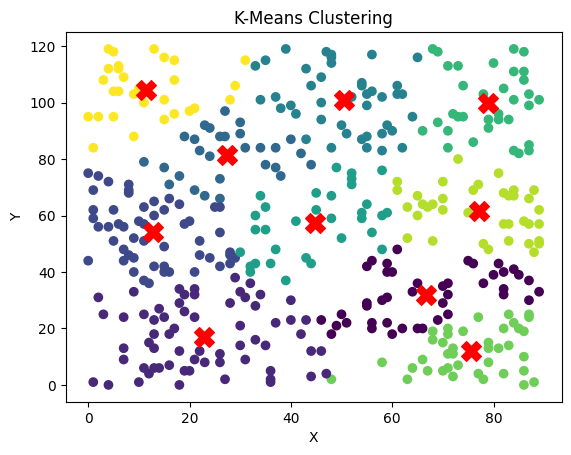

In [24]:
k=10
nb_test = 10000
d=parcours(l)
best_chemin = l

centroids, labels = k_means(l,k)

data = np.array(l.copy())
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)
plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [25]:
centroids = [list(centroid) for centroid in centroids]

In [18]:
exhaustif_centroids = exhaustif(centroids)

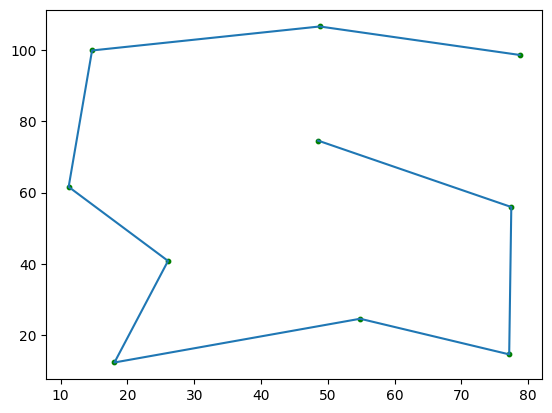

In [51]:
afficher(exhaustif_centroids)

In [26]:
def get_points_jointures(centroids,clusters):
    k=len(centroids)
    points_jointures = []
    fin_0 = plus_proche(centroids[1],clusters[0])[0]
    points_jointures.append((-1,fin_0))
    for i in range(1,k-1):
        deb = plus_proche(points_jointures[-1][1],clusters[i])[0]
        fin = plus_proche(centroids[i+1],clusters[i])[0]
        points_jointures.append((deb,fin))
    deb_k = plus_proche(points_jointures[-1][1],clusters[k-1])[0]
    fin_k = plus_proche(centroids[0],clusters[k-1])[0]
    points_jointures.append((deb_k,fin_k))
    deb_0= plus_proche(points_jointures[-1][1],clusters[0])[0]
    points_jointures[0]=(deb_0,fin_0)
    return points_jointures

In [27]:
def parcours_swap_knn(chemin):
    l=chemin.copy()
    n=len(l)
    d0=parcours(l)
    done=True
    while done:
        done=False
        for i in range(1,n-2):
            for j in range(i+1,n-1):
                d,dij=deltas(l,i,j)
                if dij<d:
                    swap(l,i,j)
                    d0=d0-d+dij
                    #print(d0)
                    done=True
                    break
            if done:
                break
    return l

In [45]:
def parcours_swap_2_knn(chemin):
    l=chemin.copy()
    n=len(l)
    d0=parcours(l)
    for i in range(1,n-2):
        dj,dimin=deltas(l,i,i+1)
        if dimin<dj:
            jmin=i+1
        else:
            jmin = -1
        for j in range(i+1,n-1):
            d,dij=deltas(l,i,j)
            if dij<d and dij<dimin:
                dj=d
                dimin=dij
                jmin=j
        if jmin != -1:
            swap(l,i,jmin)
            d0=d0-dj+dimin
    return l

In [61]:
def metric_distance_knn(p1,p2,fin):
    d1 = distance(p1,p2)
    d2 = distance(p2,fin)
    return d1-d2

In [55]:
def plus_proche_knn(p,l_ini,fin):
    l=l_ini.copy()
    if p in l:
        l.remove(p)
    pp=l[0]
    d=metric_distance_knn(p,pp,fin)
    for pi in l:
        di=metric_distance_knn(p,pi,fin)
        if di<d:
            d=di
            pp=pi
                
    return pp

In [30]:
def greedy_knn(l_ini,deb,fin):
    l=l_ini.copy()
    chemin=[]
    d=0
    p0=deb
    chemin.append(p0)
    i=0
    while len(l)>1:
        pi=plus_proche_knn(p0,l,fin)
        l.remove(p0)
        p0=pi
        chemin.append(p0)
    return chemin

In [62]:
k=10
nb_test = 100
d=parcours(l)
best_chemin = l

centroids, labels = k_means(l,k)
centroids = [list(centroid) for centroid in centroids]
exhaustif_centroids = exhaustif(centroids)
ordre_cluster = [centroids.index(exhaustif_centroid) for exhaustif_centroid in exhaustif_centroids]

clusters = [[l[i] for i in range(len(l)) if labels[i]==ki]for ki in ordre_cluster]
points_jointures = get_points_jointures(exhaustif_centroids,clusters)
chemins_clusters = [greedy_knn([x for x in clusters[i] if x!= points_jointures[i][1]],points_jointures[i][0],points_jointures[i][1]) +
                    [points_jointures[i][1]] 
                    for i in range(len(clusters))]

chemins_clusters_swap = chemins_clusters.copy()
chemins_clusters=[parcours_swap_2_knn(chemini) for chemini in chemins_clusters_swap]

chemin=[]
for ci in chemins_clusters:
    chemin = chemin+ci


chemin,d = parcours_swap_2(chemin)

"""
for _ in range(nb_test):

    chemins_clusters_swap = chemins_clusters.copy()
    chemins_clusters=[parcours_swap_knn(chemini) for chemini in chemins_clusters_swap]

    chemin=[]
    for ci in chemins_clusters:
        chemin = chemin+ci
    di = parcours(chemin)

    if di<d:
        print(di)
        d=di
        best_chemin = chemin
"""


'\nfor _ in range(nb_test):\n\n    chemins_clusters_swap = chemins_clusters.copy()\n    chemins_clusters=[parcours_swap_knn(chemini) for chemini in chemins_clusters_swap]\n\n    chemin=[]\n    for ci in chemins_clusters:\n        chemin = chemin+ci\n    di = parcours(chemin)\n\n    if di<d:\n        print(di)\n        d=di\n        best_chemin = chemin\n'

In [63]:
d

1925.9340432168033

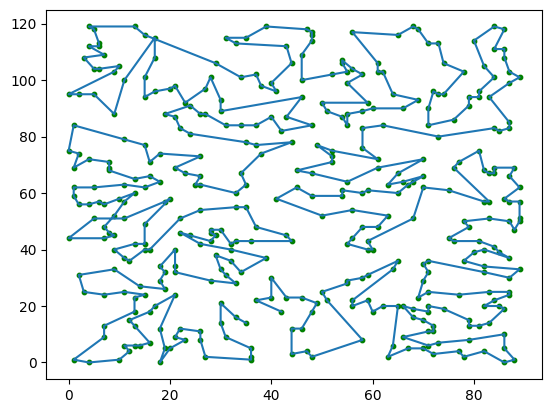

In [64]:
afficher(l)

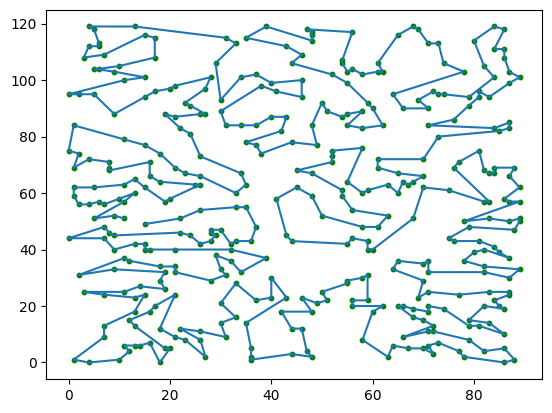

In [65]:
afficher(chemin)

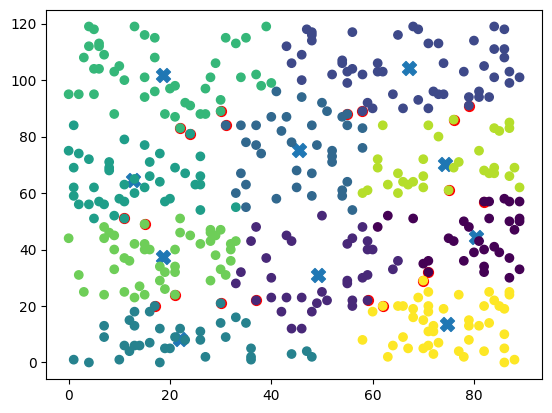

In [115]:
x=[xi[0][0] for xi in points_jointures] + [xi[1][0] for xi in points_jointures]
y=[xi[0][1] for xi in points_jointures] + [xi[1][1] for xi in points_jointures]

xc=[xi[0] for xi in centroids]
yc=[xi[1] for xi in centroids]

xcl=[xi[0] for xi in clusters]
ycl=[xi[1] for xi in clusters]



n=2
plt.scatter(x,y,s=50,color='red')
plt.scatter(xc,yc,marker='X',s=100)
data = np.array(l.copy())
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')


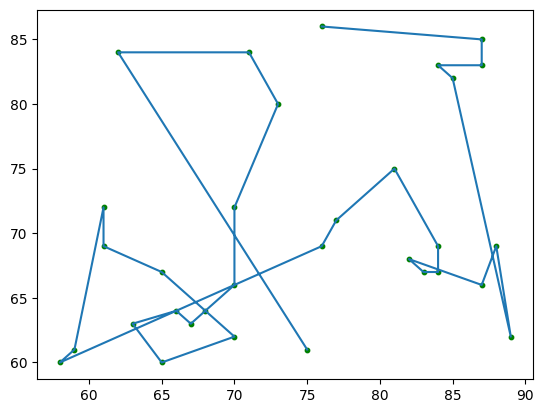

In [117]:
afficher(chemins_clusters[1])

In [ ]:
xcl=[xi[0] for xi in clusters[0]]
ycl=[xi[1] for xi in clusters[0]]
plt.scatter(xcl,ycl)

In [109]:
plus_proche(exhaustif_centroids[4],clusters[3])[0]

[31, 84]

In [110]:
points_jointures

[([71, 32], [82, 57]),
 ([75, 61], [76, 86]),
 ([79, 91], [58, 89]),
 ([55, 88], [31, 84]),
 ([30, 89], [22, 83]),
 ([24, 81], [11, 51]),
 ([15, 49], [21, 24]),
 ([17, 20], [30, 21]),
 ([37, 22], [59, 22]),
 ([62, 20], [70, 29])]

- performing k clusters with the k means algorithm
- using greedy algorithm on each of these clusters
- finding the best path between the centroids (exhaustif?)
- for the first cluster, taking the closest point from the centroid of the last cluster
- for each cluster (in the order of the previous best path), taking the closest
- link this point with the point of the next cluster

creer un nouveau greedy :
commencer au point deb des points jointures
nouvelle metrique de distance : d = dist(p0,p) - dist(p,fin), fin etant le point de fin des pts de jointures